#### To Check any version conflicts for modules and libraries.
    ! pip check

- Then resolve it by re-installing or upgrading the module and libraries to required version
- Or directly share the conflict on ChatGpt, it will provide the solution, follow steps which will work for you.

- Mostly create virtual Environment suitable for technical Stack. Because most of the libraries may not be compatible with the version of the dependent modules. Use yml file for environment and setup it using conda prompt 

In [2]:
! pip check

No broken requirements found.


- Download Spacy Library
```python
! python -m spacy download en
```
You can now load the package via spacy.load('en_core_web_sm')

In [4]:
import spacy

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
doc = nlp('Tesla is looking at buying U.S. startup for $6 million')

In [7]:
for token in doc:
    print(token.text)

Tesla
is
looking
at
buying
U.S.
startup
for
$
6
million


In [8]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


In [9]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1ffe12c75e0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1ffe12c7be0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1ffe11ca180>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1ffe1444840>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1ffe14b6940>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1ffe11ca110>)]

In [10]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [11]:
doc2 = nlp("Tesla isn't looking into startup anymore.")

In [12]:
for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
looking VERB ROOT
into ADP prep
startup NOUN pobj
anymore ADV advmod
. PUNCT punct


In [13]:
doc2[0]

Tesla

In [14]:
doc2[0].pos_

'PROPN'

In [15]:
doc2[0].dep_

'nsubj'

In [16]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [17]:
life_quote = doc3[16:30]

In [18]:
print(life_quote)

"Life is what happens to us while we are making other plans"


In [19]:
type(life_quote)

spacy.tokens.span.Span

In [20]:
type(doc3)

spacy.tokens.doc.Doc

In [21]:
doc4 = nlp("This is the first sentence. This is another sentence. This is the last sentence.")

In [22]:
for sentence in doc4.sents:
    print(sentence)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [23]:
doc4[6]

This

In [24]:
doc4[6].is_sent_start

True

# Tokenization 
- _**Tokenization**_ is the process of breaking up the original text into component pieces(_**tokens**_)
- _**Tokens**_ are the basic building blocks of a Doc object - everything that helps us understand the meaning of the test is dervied from tokens and their relationship to one another.
- Tokenization is done based on 
1. Prefix: Character(s) at the beginning, e.g. $, (, “, ¿.
2. Suffix: Character(s) at the end, e.g. km, ), ”, !.
3. Infix: Character(s) in between, e.g. -, --, /, ….
4. exception: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied.
   # _Tokenization_
   # "Let's go to N.Y.!"
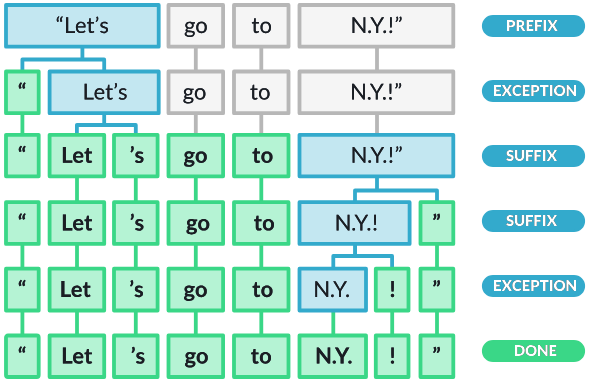

---
- First, the raw text is split on whitespace characters, similar to <code>text.split(' ')</code>. Then, the tokenizer processes the text from left to right. On each substring, it performs two checks:

     1. Does the substring match a tokenizer exception rule? For example, “don’t” does not contain whitespace, but should be split into two tokens, “do” and “n’t”, while “U.K.” should always remain one token.
     2. Can a prefix, suffix or infix be split off? For example punctuation like commas, periods, hyphens or quotes.

In [26]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [27]:
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [28]:
doc = nlp(mystring)

In [29]:
for token in doc:
    print(token.text)

"
We
're
moving
to
L.A.
!
"


In [30]:
doc2 = nlp("We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

In [31]:
for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [32]:
doc3 = nlp("A 5km NYC ride costs $10.30")

In [33]:
for t in doc3:
    print(t.text)

A
5
km
NYC
ride
costs
$
10.30


In [34]:
doc4 = nlp("Let's visit St. Louis in the U.S. next year.")

In [35]:
for tok in doc4:
    print(tok)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


In [36]:
len(doc4)

11

In [37]:
len(doc4.vocab)

793

In [38]:
doc5 = nlp("It is better to give than receive")
doc5[0]

It

In [39]:
doc5[2:5]

better to give

- Assignment is not allowed
```Python
doc5[0] = 'text'

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

In [41]:
doc6 = nlp("Apple to build a Hong Kong factory for $6 million")

In [42]:
for token in doc6:
    print(token.text,end="   |   ")

Apple   |   to   |   build   |   a   |   Hong   |   Kong   |   factory   |   for   |   $   |   6   |   million   |   

In [43]:
for entity in doc6.ents:
    print(entity)

Apple
Hong Kong
$6 million


In [44]:
for entity in doc6.ents:
    print(entity, entity.label_)

Apple ORG
Hong Kong GPE
$6 million MONEY


In [45]:
for entity in doc6.ents:
    print(entity, entity.label_)
    print(str(spacy.explain(entity.label_)))
    print("----------------------------------------")

Apple ORG
Companies, agencies, institutions, etc.
----------------------------------------
Hong Kong GPE
Countries, cities, states
----------------------------------------
$6 million MONEY
Monetary values, including unit
----------------------------------------


In [46]:
doc7 = nlp("Autonomous cars shift insurance liability toward manufacturers.")
for chunk in doc7.noun_chunks:
    print(chunk)

Autonomous cars
insurance liability
manufacturers


In [47]:
from spacy import displacy

In [48]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [49]:
doc = nlp("Apple is going to build a U.K. factory for $6 million")

In [50]:
displacy.render(doc,style='dep',jupyter=True,options={'distance':140})

In [51]:
doc = nlp("Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.")

In [52]:
displacy.render(doc,style='ent',jupyter=True)

---

- For More details on Spacy Visualizer click on below link

  [Spacy Visualizers](https://spacy.io/usage/visualizers)